In [17]:
# Unit 8 Project 1
      
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import datetime as dt
import os
import matplotlib.pyplot as plt

from pathlib import Path
%matplotlib inline

In [18]:
print(f"Current Working Directory: {Path.cwd()}")

Current Working Directory: /Users/Agzy/Desktop/Project 1


In [30]:
# Reading returns CSV file into DataFrame
pre_covid = Path("Data/Pre_2.csv")               
pre_covid_df = pd.read_csv(pre_covid,index_col="DATE", parse_dates=True, infer_datetime_format=True)
pre_covid_df.head()

post_covid = Path("Data/Post_2.csv") 
post_covid_df = pd.read_csv(post_covid,index_col="DATE", parse_dates=True, infer_datetime_format=True)

post_covid_df.dtypes

DJI          float64
S&P500       float64
NASDAQ       float64
TSX          float64
TSX_60       float64
HSI          float64
SHA          float64
NIKKEI       float64
EURO         float64
FTSE_100     float64
FTSE_MIB     float64
AUS          float64
WTI_Crude    float64
GOLD         float64
dtype: object

In [32]:
# Count nulls in Pre Covid DataFrame
pre_covid_df.isna().sum()

DJI           0
S&P500        0
NASDAQ        0
TSX           5
TSX_60        5
HSI          11
SHA          20
NIKKEI       20
EURO          9
FTSE_100      4
FTSE_MIB      6
AUS           5
WTI_Crude     3
GOLD          3
dtype: int64

In [33]:
# Count nulls in Post Covid DataFrame
post_covid_df.isna().sum()

DJI           0
S&P500        0
NASDAQ        0
TSX           5
TSX_60        5
HSI          10
SHA          19
NIKKEI       18
EURO          9
FTSE_100      4
FTSE_MIB      6
AUS           4
WTI_Crude     3
GOLD          3
dtype: int64

In [53]:
# Drop nulls from Pre Covid Dataframe
pre_covid_df.dropna(inplace=True)
pre_covid_df.isnull().sum()

# Drop nulls from Post Covid Dataframe
pre_covid_df.dropna(inplace=True)
pre_covid_df.isnull().sum()

DJI          0
S&P500       0
NASDAQ       0
TSX          0
TSX_60       0
HSI          0
SHA          0
NIKKEI       0
EURO         0
FTSE_100     0
FTSE_MIB     0
AUS          0
WTI_Crude    0
GOLD         0
dtype: int64

In [74]:
pre_covid_df.count()
post_covid_df.head()

,DJI,S&P500,NASDAQ,TSX,TSX_60,HSI,SHA,NIKKEI,EURO,FTSE_100,FTSE_MIB,AUS,WTI_Crude,GOLD
DATE,,,,,,,,,,,,,,
2019-07-02,26786.67969,2973.01001,8109.08984,16471.30078,985.45,28875.56055,3043.94312,21754.26953,3507.97998,7559.2,21392.87,6653.20020,56.25,1404.59998
2019-07-05,26922.11914,2990.40991,8161.79004,16542.00000,989.73,28774.83008,3011.05908,21746.38086,3527.97998,7553.1,21985.79,6751.29981,57.51,1396.69995
2019-07-08,26806.14063,2975.94995,8098.37988,16463.00000,985.05,28331.68945,2933.36304,21534.34961,3523.76001,7549.3,21976.00,6672.20020,57.66,1397.00000
2019-07-09,26783.49023,2979.62988,8141.72998,16545.19922,991.27,28116.27930,2928.22998,21565.15039,3509.75000,7536.5,21886.17,6665.70020,57.83,1397.50000
2019-07-10,26860.19922,2993.07007,8202.53027,16563.30078,990.76,28204.68945,2915.30200,21533.48047,3501.52002,7530.7,22044.96,6689.79981,60.43,1410.09998


In [59]:
# Calculate Daily Returns for Pre Covid Data
daily_returns_pre_covid = pre_covid_df.pct_change()
daily_returns_pre_covid.head()

# Calculate Daily Returns for Post Covid Data
daily_returns_post_covid = post_covid_df.pct_change()
daily_returns_post_covid.head()

,DJI,S&P500,NASDAQ,TSX,TSX_60,HSI,SHA,NIKKEI,EURO,FTSE_100,FTSE_MIB,AUS,WTI_Crude,GOLD
DATE,,,,,,,,,,,,,,
2019-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-05,0.005056,0.005853,0.006499,0.004292,0.004343,-0.003488,-0.010803,-0.000363,0.005701,-0.000807,0.027716,0.014745,0.022400,-0.005624
2019-07-08,-0.004308,-0.004835,-0.007769,-0.004776,-0.004729,-0.015400,-0.025804,-0.009750,-0.001196,-0.000503,-0.000445,-0.011716,0.002608,0.000215
2019-07-09,-0.000845,0.001237,0.005353,0.004993,0.006314,-0.007603,-0.001750,0.001430,-0.003976,-0.001696,-0.004088,-0.000974,0.002948,0.000358
2019-07-10,0.002864,0.004511,0.007468,0.001094,-0.000514,0.003144,-0.004415,-0.001469,-0.002345,-0.000770,0.007255,0.003615,0.044959,0.009016


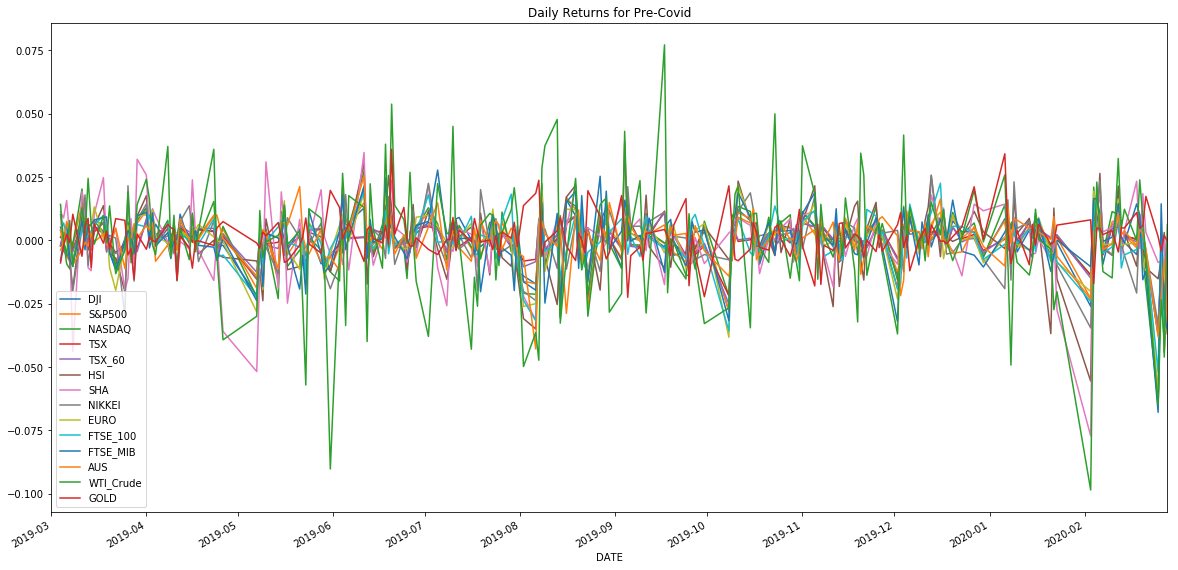

In [64]:
# Plotting the daily returns for Pre Covid daily returns
daily_returns_pre_covid.plot(title='Daily Returns for Pre-Covid', figsize=(20,10))

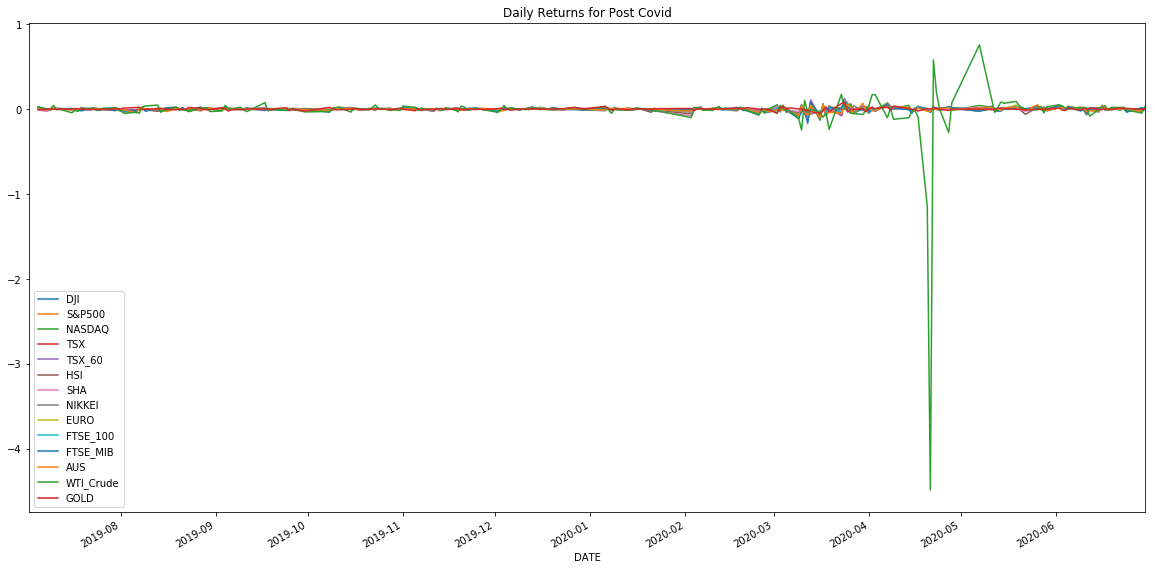

In [63]:
# Plotting the daily returns for Post Covid daily returns
daily_returns_post_covid.plot(title='Daily Returns for Post Covid', figsize=(20,10))

In [93]:
# Drop WTI Crude's Daily return data
daily_returns_post_covid_1 =daily_returns_post_covid.drop(columns = ['WTI_Crude','GOLD','DJI', 'NASDAQ','TSX_60', 'FTSE_MIB', 'HSI', 'AUS'])
daily_returns_pre_covid_1= daily_returns_pre_covid.drop(columns = ['WTI_Crude','GOLD','DJI', 'NASDAQ','TSX_60', 'FTSE_MIB','HSI','AUS'])

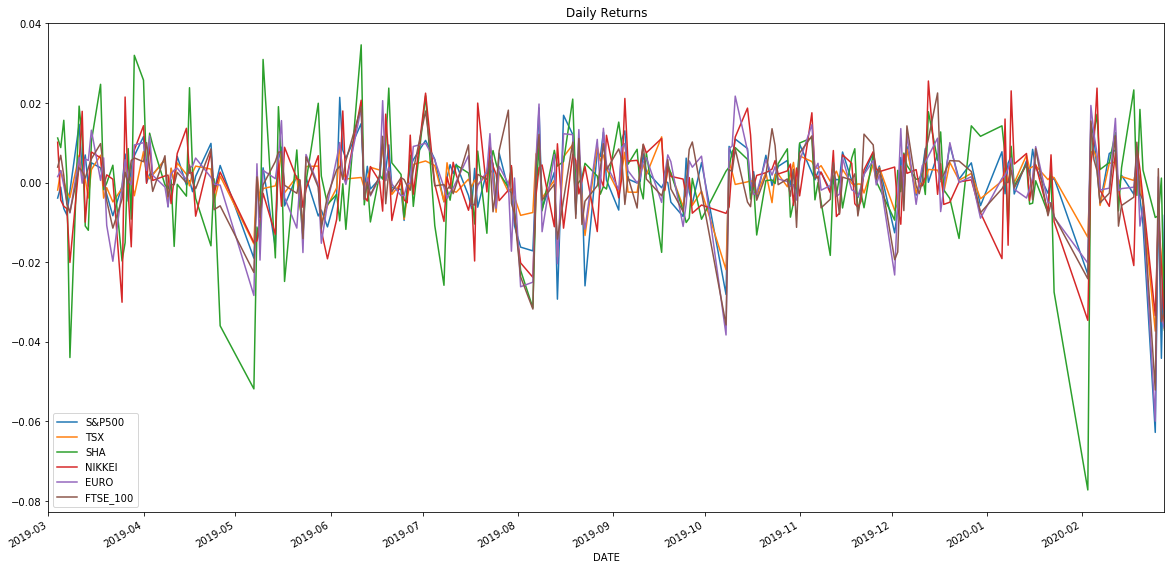

In [94]:

# Plotting the daily returns
daily_returns_pre_covid_1.plot(title='Daily Returns', figsize=(20,10))

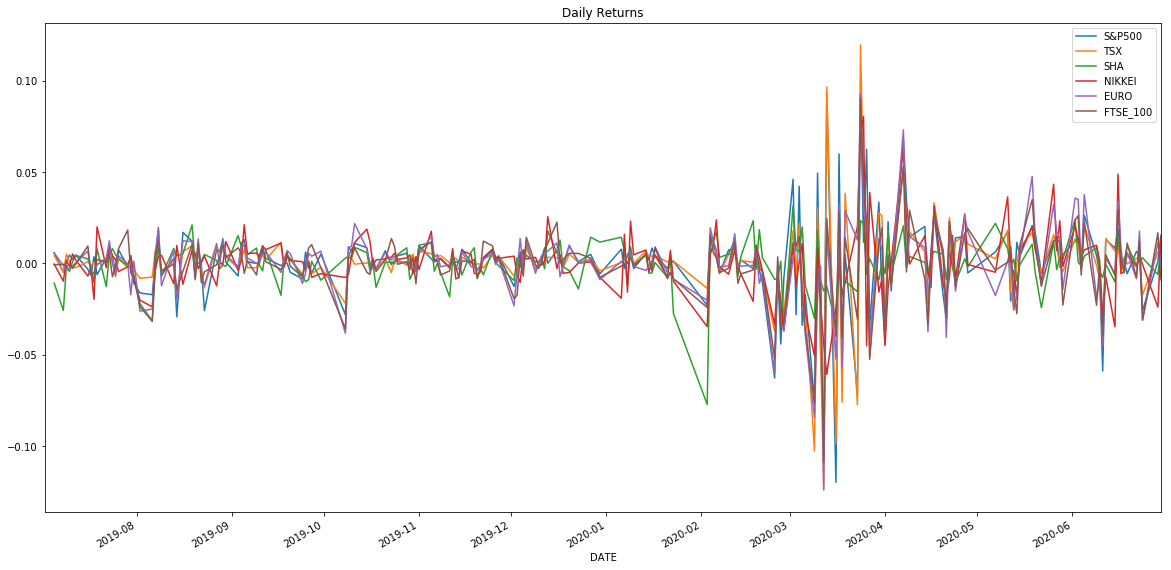

In [95]:
#Portfolio Analysis - calculate and visualize performance and risk metrics for Pre Covid

# Plotting the daily returns and cumulative returns.
daily_returns_post_covid_1.plot(title='Daily Returns', figsize=(20,10))


In [98]:
# Calculate cumulative returns for Pre Covid
cumulative_returns_pre_covid = (1 + daily_returns_pre_covid_1).cumprod()
cumulative_returns_pre_covid.head()

# Calculate cumulative returns for Post Covid
cumulative_returns_post_covid = (1 + daily_returns_post_covid_1).cumprod()
cumulative_returns_post_covid.head()

,S&P500,TSX,SHA,NIKKEI,EURO,FTSE_100
DATE,,,,,,
2019-07-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-05,1.005853,1.004292,0.989197,0.999637,1.005701,0.999193
2019-07-08,1.000989,0.999496,0.963672,0.989891,1.004498,0.998690
2019-07-09,1.002227,1.004486,0.961986,0.991307,1.000505,0.996997
2019-07-10,1.006747,1.005585,0.957739,0.989851,0.998158,0.996230


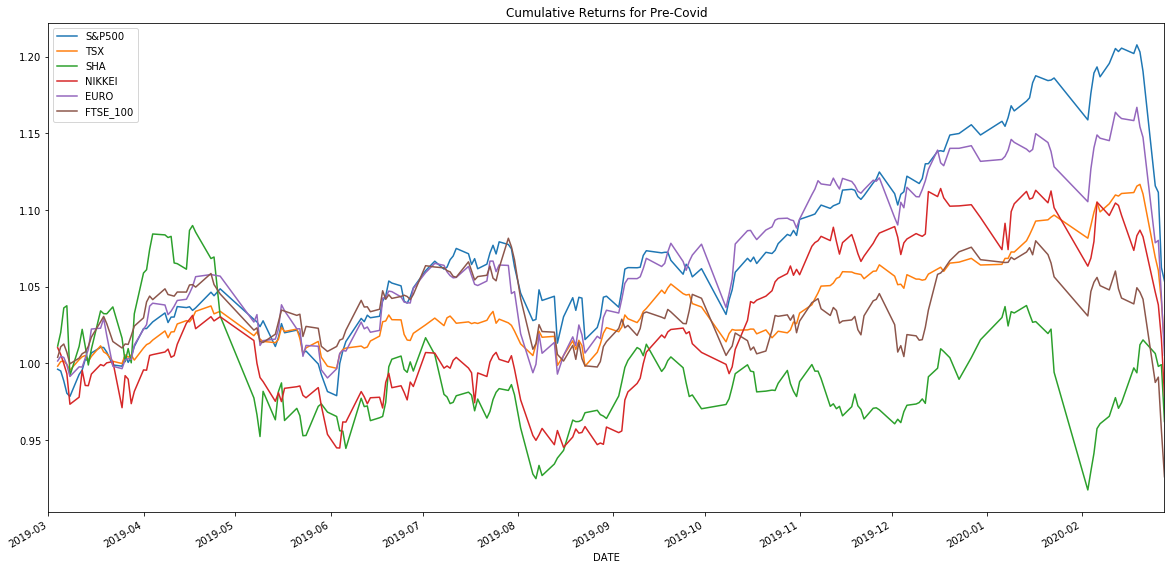

In [99]:
# Plotting cumulative returns for Pre Covid
cumulative_returns_pre_covid.plot(title='Cumulative Returns for Pre-Covid', figsize=(20,10))

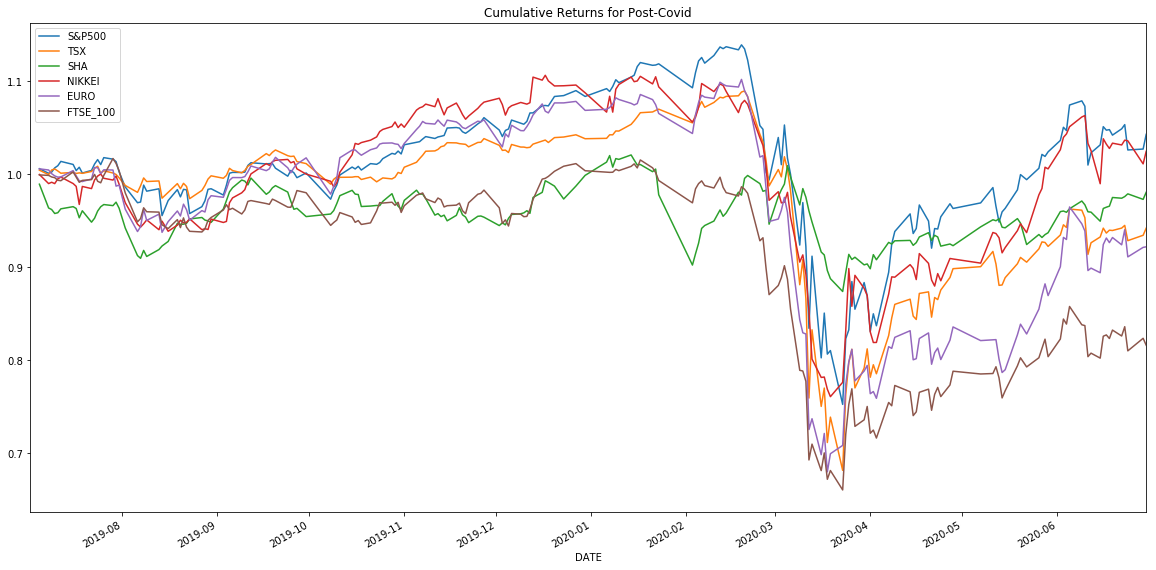

In [100]:
# Plotting cumulative returns for Post Covid
cumulative_returns_post_covid.plot(title='Cumulative Returns for Post-Covid', figsize=(20,10))

In [103]:
# Calculate the standard deviation for Pre & Post Covid

#Pre Covid STD
daily_returns_pre_covid_std = daily_returns_pre_covid_1.std().sort_values(ascending=False)
daily_returns_pre_covid_std

#Post Covid STD
daily_returns_post_covid_std = daily_returns_post_covid_1.std().sort_values(ascending=False)
daily_returns_post_covid_std


S&P500      0.023518
TSX         0.022851
EURO        0.021086
FTSE_100    0.019247
NIKKEI      0.017474
SHA         0.011941
dtype: float64

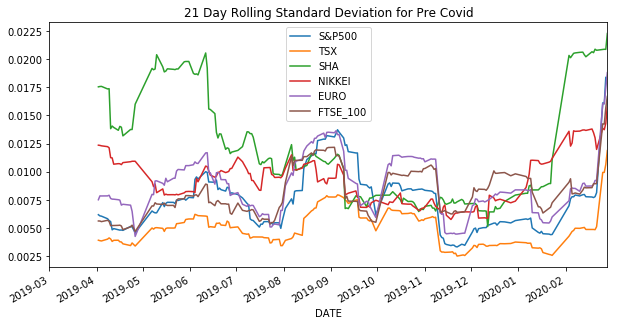

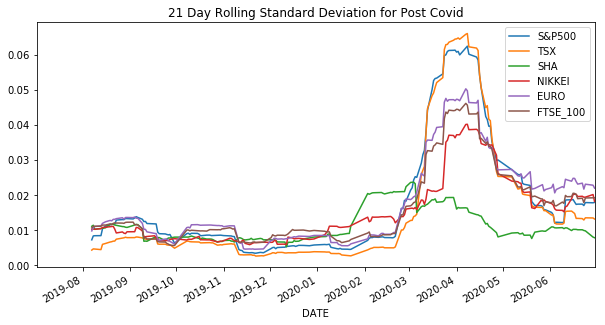

In [106]:
#Rolling Statistics - Risk changes over time. Analyze the rolling statistics for Risk and Beta.

#Calculate and plot the rolling standard deviation for the S&P 500 and whale portfolios using a 21 trading day window

#sorting before the moving averages for Pre & Post Covid
daily_returns_pre_covid = daily_returns_pre_covid_1.sort_index()
daily_returns_post_covid = daily_returns_post_covid_1.sort_index()

#Calculating rolling std using 21 trading day window
rolling_std_pre_covid = daily_returns_pre_covid.rolling(window=21).std().plot(title = '21 Day Rolling Standard Deviation for Pre Covid', figsize =[10,5])
rolling_std_post_covid = daily_returns_post_covid.rolling(window=21).std().plot(title = '21 Day Rolling Standard Deviation for Post Covid', figsize =[10,5])
#plotting


In [124]:
#Construct a correlation table for Pre & Post Covid
correlation_table_pre_covid = daily_returns_pre_covid.corr()
correlation_table_post_covid = daily_returns_post_covid.corr()
correlation_table_pre_covid

,S&P500,TSX,SHA,NIKKEI,EURO,FTSE_100
S&P500,1.000000,0.836073,0.319212,0.411985,0.819397,0.725458
TSX,0.836073,1.000000,0.332982,0.463117,0.799956,0.722295
SHA,0.319212,0.332982,1.000000,0.496405,0.405466,0.419013
NIKKEI,0.411985,0.463117,0.496405,1.000000,0.450363,0.477313
EURO,0.819397,0.799956,0.405466,0.450363,1.000000,0.850885
FTSE_100,0.725458,0.722295,0.419013,0.477313,0.850885,1.000000


In [125]:
correlation_table_post_covid

,S&P500,TSX,SHA,NIKKEI,EURO,FTSE_100
S&P500,1.000000,0.906823,0.387593,0.358314,0.748271,0.763751
TSX,0.906823,1.000000,0.393847,0.412146,0.798657,0.833555
SHA,0.387593,0.393847,1.000000,0.534598,0.429652,0.453718
NIKKEI,0.358314,0.412146,0.534598,1.000000,0.576323,0.530764
EURO,0.748271,0.798657,0.429652,0.576323,1.000000,0.933315
FTSE_100,0.763751,0.833555,0.453718,0.530764,0.933315,1.000000


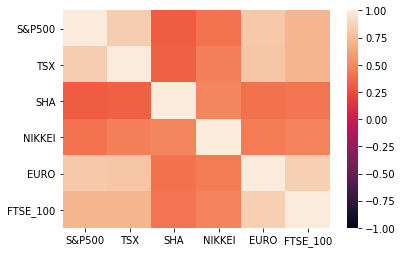

In [112]:
#correlation matrix using a heatmap for Pre-Covid & Post-Covid
sns.heatmap(correlation_table_pre_covid, vmin=-1, vmax=1)

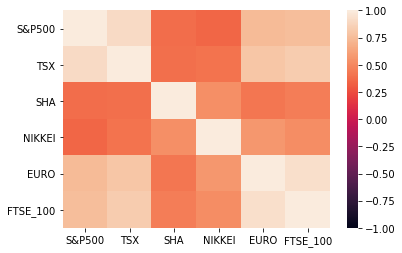

In [113]:
sns.heatmap(correlation_table_post_covid, vmin=-1, vmax=1)

In [130]:
#5. Calculate the Sharpe ratios by computing the quotient of `annualized average return` and `annualized standard deviation`.
sharpe_ratios_pre_covid = (daily_returns_pre_covid.mean() * 252) / (daily_returns_pre_covid.std()* np.sqrt(252))


sharpe_ratios_post_covid = (daily_returns_post_covid.mean() * 252) / (daily_returns_post_covid.std()* np.sqrt(252))
sharpe_ratios_pre_covid

daily_returns_pre_covid.tail(1)

,S&P500,TSX,SHA,NIKKEI,EURO,FTSE_100
DATE,,,,,,
2020-02-28,-0.008238,-0.027175,-0.037116,-0.036689,-0.036584,-0.031752


In [123]:
sharpe_ratios_post_covid

S&P500      0.328938
TSX        -0.022874
SHA        -0.034467
NIKKEI      0.246776
EURO       -0.134984
FTSE_100   -0.678927
dtype: float64

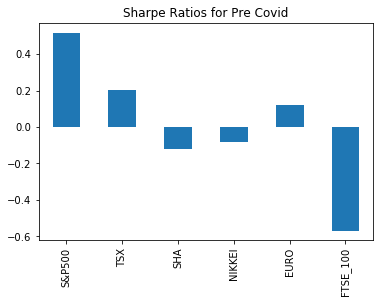

In [120]:
#6. Plot the Sharpe ratios using a bar chart.
sharpe_ratios_pre_covid.plot(kind="bar", title="Sharpe Ratios for Pre Covid")

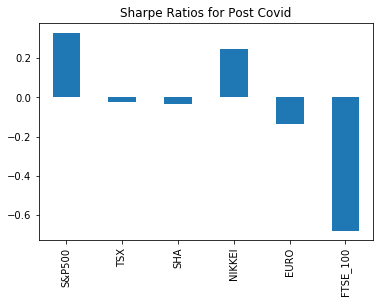

In [121]:
sharpe_ratios_post_covid.plot(kind="bar", title="Sharpe Ratios for Post Covid")

In [33]:
# combined_portfolios_df_post= combined_portfolios_df['2015-01-01':'2016-12-20']
# combined_portfolios_df_post.count()


#Analysis 
#1. Split the Data into 

#Zeldi and Richa
    # Pre 1 - Jan 1 2015 - Dec 31 2019, Post 1 - Jan 1 2015 - Jul 23 2020

#Amit & Mihir
    # Pre 2 - Mar 1 2019 - Feb 28 2020, Post 2 - July 1 2019 - Jun 30 2020
#2.Take each csv file and run a monte carlo 

# Use the `mean` function to calculate the mean of daily returns for "SPY", "AGG"
# avg_daily_return_spy = daily_returns.mean()['SPY']['close']
# avg_daily_return_agg = daily_returns.mean()['AGG']['close']
# print(f"Average Daily Return of SPY stock is: {avg_daily_return_spy}")
# print(f"Average Daily Return of AGG stock is: {avg_daily_return_agg}")

DJI        94
INX        94
NDAQ       94
NI225      94
SHA        94
SX5E       94
TSX        94
UKX        94
W5000      94
XJO        94
FTSEMIB    94
GOLD       94
dtype: int64

In [144]:
# Avg daily return Pre & Post Covid

avg_daily_return_sp500 = daily_returns_pre_covid.mean()['S&P500']

# STD  for pre covid
std_dev_daily_return_precovid_sp500 = daily_returns_pre_covid.std()['S&P500']


In [145]:
# Compute daily volatility - change it 
std_dev_daily_return_sp500 = daily_returns_pre_covid.std()['S&P500']

print(f"Daily Volatility of S&P 500 stock is: {std_dev_daily_return_sp500}")


Daily Volatility of S&P 500 stock is: 0.009355426246885786


In [146]:
# Save the last day's closing price - change it 
sp500_last_price = pre_covid_df['S&P500'][-1]

print(f"Last Day's Closing Price of S&P 500 stock is: {sp500_last_price }")


Last Day's Closing Price of S&P 500 stock is: 2954.21997


In [172]:
# Setup the Monte Carlo Parameters
number_simulations = 1000
number_records = 252 * 20
# number_records2 = 252 * 20
#number_records3 = 252 * 20

# Initialize empty DataFrame to hold simulated prices for each simulation
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [173]:
# Run the Monte Carlo Simulation

# Run the simulation of projecting stock prices for the next trading year, 600` times
for n in range(number_simulations):

    # Initialize the simulated prices list with the last closing price of `SPY` and `AGG`
    simulated_sp500_prices = [sp500_last_price]
    
    
    # Simulate the returns for 252 * 30 days
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        simulated_sp500_price = simulated_sp500_prices[-1] * (1 + np.random.normal(avg_daily_return_sp500, std_dev_daily_return_precovid_sp500))

        
        # Append the simulated price to the list
        simulated_sp500_prices.append(simulated_sp500_price)
    
    # Append the simulated prices of each simulation to DataFrame
    monte_carlo= pd.Series(simulated_sp500_prices)
    
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns_pre_covid = monte_carlo.pct_change()
    
#     # Set the portfolio weights (60% SPY; 40% AGG)
#     weights = [0.60, 0.40]

#     # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
#     portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + simulated_daily_returns_pre_covid.fillna(0)).cumprod()

portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994402,0.984931,1.003707,0.998498,0.997539,1.006437,1.005642,0.997196,1.008213,1.016105,...,1.003913,0.985619,0.991073,1.010162,0.999097,1.011534,0.988363,1.010245,0.992589,0.990688
2,0.998914,0.980632,0.996117,1.001946,0.993712,1.006629,1.016646,1.006157,1.011512,1.025835,...,1.016320,1.002630,0.982883,1.008645,0.994821,1.006907,0.990804,1.009347,0.988895,0.991758
3,0.994734,0.997593,0.987330,0.993353,0.980272,0.978499,1.006961,1.015166,1.004189,1.045461,...,1.041762,1.010144,0.984094,1.021856,0.990291,1.011026,0.993181,1.011140,0.988567,0.987086
4,1.003002,1.000434,0.997048,0.995486,0.989644,0.979311,0.999368,1.012641,1.001038,1.066148,...,1.037607,1.010175,0.984280,1.025353,0.995155,1.029344,0.990763,1.009833,1.002709,0.990127


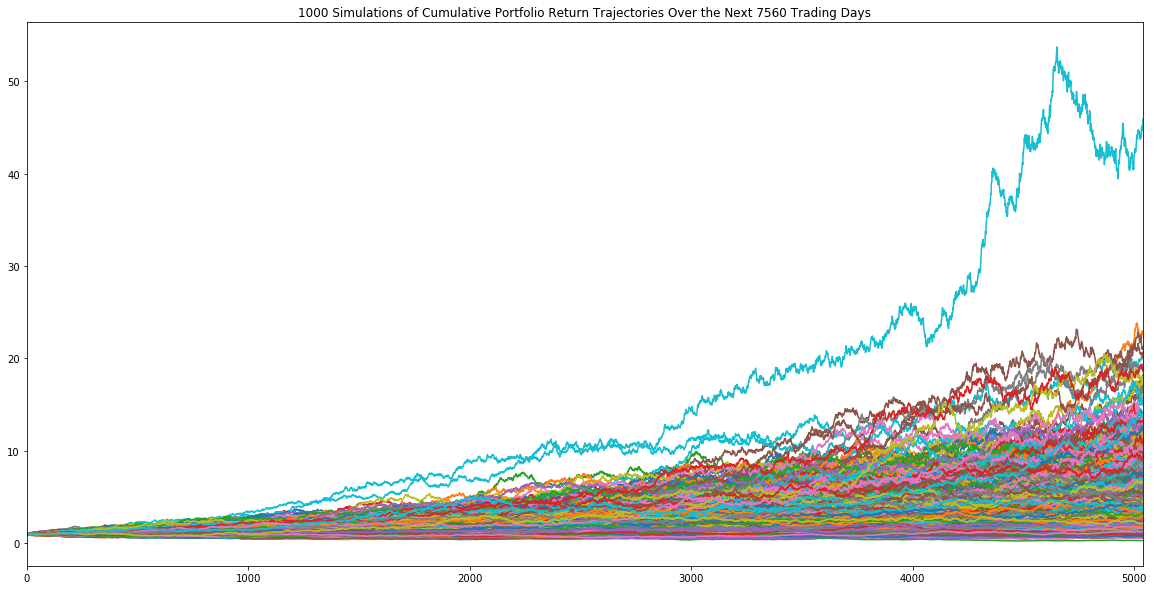

In [174]:
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title, figsize =(20,10))

In [175]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0     2.968691
1    10.528190
2    10.253041
3     2.624269
4    10.699722
Name: 5040, dtype: float64

In [176]:
ending_cumulative_returns.min(), ending_cumulative_returns.max(), ending_cumulative_returns.median()

(0.29567782012466987, 45.909078486684116, 3.723300312018128)

In [177]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05     1.212698
0.95    10.400060
Name: 5040, dtype: float64

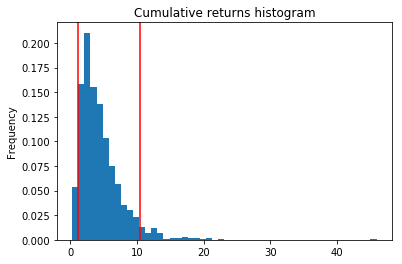

In [178]:
# Visualize the distribution of the ending returns
plt.figure();
ending_cumulative_returns.plot(kind="hist", title = "Cumulative returns histogram", density=True, bins=50)
plt.axvline(confidence_interval.iloc[0], color="r")
plt.axvline(confidence_interval.iloc[1], color="r")
#plt.savefig(‘./Images/ending_returns_hist.png’)

In [181]:
# Compute cumulative returns
cumulative_returns_percentiles = ending_cumulative_returns.quantile(q=[0.1, 0.5, 0.90])
print(f"Expected cumulative returns at 30 years for 10th, 50th and 90th percentiles: \n{cumulative_returns_percentiles}")

Expected cumulative returns at 30 years for 10th, 50th and 90th percentiles: 
0.1    1.550267
0.5    3.723300
0.9    8.510574
Name: 5040, dtype: float64


In [182]:
# Set initial investment
initial_investment = 20000
# Compute expected portfolio return
cumulative_pnl = initial_investment * cumulative_returns_percentiles
cumulative_pnl.astype(int)

0.1     31005
0.5     74466
0.9    170211
Name: 5040, dtype: int64